In [17]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2 as cv
from scipy.signal import convolve2d
import os

In [40]:
def lucas_kanade(imfirst, imsecond): 
    myframe = cv.imread(imfirst)
    Image1 = cv.cvtColor(myframe, cv.COLOR_BGR2GRAY) 
    newframe = cv.imread(imsecond)
    Image2 = cv.cvtColor(newframe, cv.COLOR_BGR2GRAY)

    color = np.random.randint(0, 255, (100, 3)) 
    Gx = np.reshape(np.asarray([[-1, 1], [-1, 1]]), (2, 2))
    Gy = np.reshape(np.asarray([[-1, -1], [1, 1]]), (2, 2)) 
    Gt1 = np.reshape(np.asarray([[-1, -1], [-1, -1]]), (2, 2)) 
    Gt2 = np.reshape(np.asarray([[1, 1], [1, 1]]), (2, 2))

    lx = (convolve2d(Image1, Gx) + convolve2d(Image2, Gx)) / 2
    ly = (convolve2d(Image1, Gy) + convolve2d(Image2, Gy)) / 2 
    lt1 = convolve2d(Image1, Gt1) + convolve2d(Image2, Gt2)
    feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)
    
    features= cv.goodFeaturesToTrack(Image1, mask = None, **feature_params) 
    feature = np.int32(features)
    feature = np.reshape(feature, newshape=[-1, 2])
    
    u = np.ones(lx.shape)
    v = np.ones(lx.shape)
    status = np.zeros(feature.shape[0])
    A = np.zeros((2, 2))
    B = np.zeros((2, 1))
    mask = np.zeros_like(myframe)
    newFeature = np.zeros_like(feature)
    
    for a, i in enumerate(feature): 
        x, y = i
        A[0, 0] = np.sum((lx[y-1:y+2, x-1:x+2])** 2) 
        A[1, 1] = np.sum((ly[y-1:y+2, x-1:x+2])** 2) 
        A[0, 1] = np.sum(lx[y-1:y+2, x-1:x+2] * ly[y-1:y+2, x-1:x+2])
        A[1, 0] = np.sum(lx[y-1:y+2, x-1:x+2] * ly[y-1:y+2, x-1:x+2])
        Ainv = np.linalg.pinv(A)
        B[0, 0] =- np.sum(lx[y-1:y+2, x-1:x+2] * lt1[y-1:y+2, x-1:x+2])
        B[1, 0] =- np.sum(ly[y-1:y+2, x-1:x+2] * lt1[y-1:y+2, x-1:x+2])
        prod = np.matmul(Ainv, B)
        u[y, x] = prod[0]
        v[y, x] = prod[1]
        newFeature[a] = [np.int32(x+u[y,x]),np.int32(y+v[y,x])]
        if np.int32(x+u[y,x])==x and np.int32(y+v[y,x])==y:
            status[a]=0
        else:
            status[a]=1
            
    um = np.flipud(u)
    vm = np.flipud(v)
    good_new = newFeature[status==1] 
    good_old = feature[status==1] 
    print(good_new.shape) 
    print(good_old.shape)
        
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv.line(mask, (a, b), (c, d), color[i].tolist(), 2)
        newframe = cv.circle(newframe, (a, b), 5, color[i].tolist(), -1) 
        
    img = cv.add(newframe, mask)
    return img

(24, 2)
(24, 2)


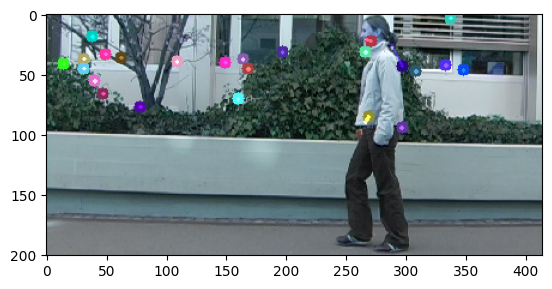

In [41]:
basketball_image = lucas_kanade("data/images/train/116.png", "data/images/train/117.png")
plt.imshow(basketball_image)
plt.show()

In [18]:
items = os.listdir("data/images/train")

In [31]:
old_name = " "
old_shape = 0
output = list()
for item in items:
    frame = cv.imread("data/images/train/" + item)
    new_shape = frame.shape
    if new_shape == old_shape:
        output.append([old_name, item])
    old_name = item
    old_shape = new_shape

In [34]:
output

[['116.png', '117.png'],
 ['185.png', '186.png'],
 ['190.png', '191.png'],
 ['198.png', '199.png'],
 ['204.png', '205.png'],
 ['207.png', '208.png'],
 ['208.png', '209.png'],
 ['212.png', '213.png'],
 ['230.png', '231.png'],
 ['248.png', '249.png'],
 ['55.png', '56.png'],
 ['67.png', '68.png'],
 ['90.png', '91.png']]